<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/camera_intrinsic_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Transformation and reverse transformation of a vector

In [1]:
import numpy as np

A = np.array([1, 1, 1, 1])
T = np.array([
    [1, 0, 0, 1],
    [0, 1, 1, 80],
    [0, 0, 1, 10],
    [0, 0, 0, 1]
])

B = np.matmul(A, T)
BA = np.matmul(B, np.linalg.inv(T))
print(A, BA)

[1 1 1 1] [1. 1. 1. 1.]


In [2]:
!pip -q install ipympl
!pip -q install pytransform3d

     |████████████████████████████████| 510 kB 4.0 MB/s 
     |████████████████████████████████| 11.2 MB 54.4 MB/s 
     |████████████████████████████████| 1.6 MB 57.3 MB/s 
     |████████████████████████████████| 965 kB 56.6 MB/s 
     |████████████████████████████████| 79 kB 3.1 MB/s 


In [1]:
!git clone https://github.com/wingedrasengan927/Image-formation-and-camera-calibration.git
%cd Image-formation-and-camera-calibration

fatal: destination path 'Image-formation-and-camera-calibration' already exists and is not an empty directory.
/content/Image-formation-and-camera-calibration


# Camera Extrinsic

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] [[ 1.  0.  0.  0.]
 [ 0.  1.  0. -8.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]] [0]


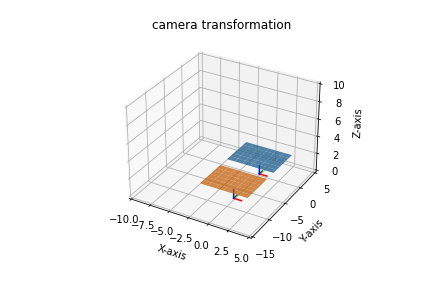

In [3]:
import numpy as np
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *

# rotate an angle of pi/4 along the standard Y axis
angles = [np.pi/4]
order = 'y'

# transalte by the given offset
offset = np.array([0, -8, 0])

# define parameters for the image plane
f = 2
img_size = (7, 7)

# create rotation transformation matrix
angles = [0]
R = create_rotation_transformation_matrix(angles, order)
R_ = np.identity(4)
R_[:3, :3] = R

# create translation transformation matrix
T_ = create_translation_matrix(offset)
print(R_, T_, angles)

# create an image grid
xx, yy, Z = create_image_grid(f, img_size)
# convert the image grid to homogeneous coordinates
pt_h = convert_grid_to_homogeneous(xx, yy, Z, img_size)
# transform the homogeneous coordinates
pt_h_transformed = R_ @ T_ @ pt_h
# convert the transformed homogeneous coordinates back to the image grid
xxt, yyt, Zt = convert_homogeneous_to_grid(pt_h_transformed, img_size)

# define axis and figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-10, 5), ylim=(-15, 5), zlim=(0, 10))

# plot the global basis and the transformed camera basis
ax = pr.plot_basis(ax)
ax = pr.plot_basis(ax, R, offset)

# plot the original and transformed image plane
ax.plot_surface(xx, yy, Z, alpha=0.75)
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

ax.set_title("camera transformation")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis");

# Camera Intrinsics: 
preparation

Text(0.5, 0, 'Z-axis')

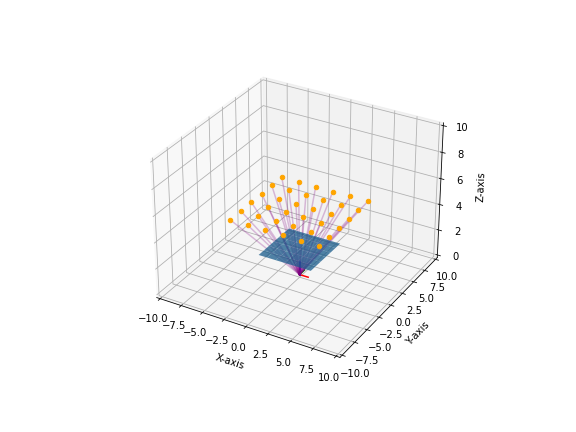

In [4]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *

# define parameters
# points
n_points = 6
xlim = (-5, 5)
ylim = (-5, 5)
elevation = 5

# image plane
img_size = (7, 7)
f = 2

points = create_same_plane_points(n_points, xlim, ylim, elevation)
xx, yy, Z = create_image_grid(f, img_size)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# plot image plane
ax.plot_surface(xx, yy, Z, alpha=0.75)

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 10))
ax = pr.plot_basis(ax)

# plot the points
c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:, c]
        ax.scatter(*point, color="orange")
        ax.plot(*make_line(origin, point), color="purple", alpha=0.25)
        c += 1
        
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

Camera Intrinsics: toy example

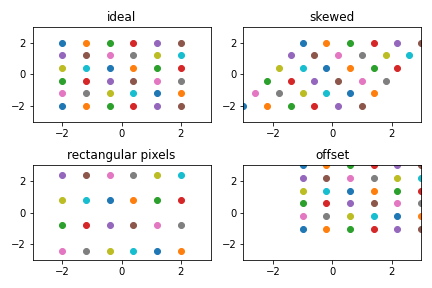

In [5]:
types = ["ideal", "skewed", "rectangular pixels", "offset"]
K1 = compute_intrinsic_parameter_matrix(2, 0, 1, 0, 0) # normal / ideal
K2 = compute_intrinsic_parameter_matrix(2, 1, 1, 0, 0) # skewed
K3 = compute_intrinsic_parameter_matrix(2, 0, 2, 0, 0) # rectangular pixels
K4 = compute_intrinsic_parameter_matrix(2, 0, 1, 1, 1) # offset

projection_points1 = compute_image_projection(points, K1)
projection_points2 = compute_image_projection(points, K2)
projection_points3 = compute_image_projection(points, K3)
projection_points4 = compute_image_projection(points, K4)

h, w = img_size
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4))

c = 1
for i in range(ncols):
    for j in range(nrows):
        ax = axes[i][j]
        ax.set(xlim = (-(h // 2), w // 2), ylim = (-(h // 2), w // 2))
        ax.set_title(types[c-1])
        for k in range(n_points * n_points):
                ax.scatter(*eval(f"projection_points{c}")[:, k])
        c += 1

plt.tight_layout()


Camera Intrinsics: real-example

Text(0.5, 0, 'Z-axis')

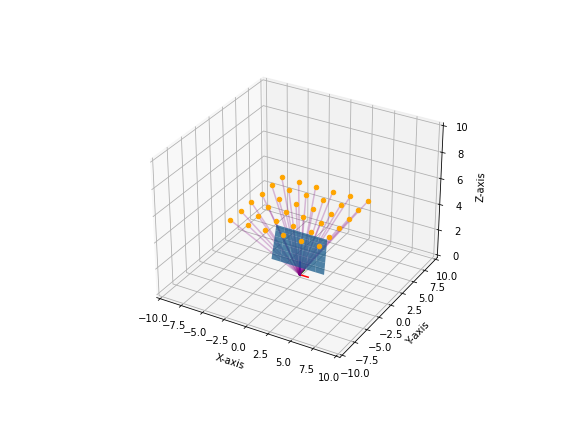

In [6]:
# 1. extract image plane points
h_grid = convert_grid_to_homogeneous(xx, yy, Z, img_size)
h_grid = h_grid[:-1, :] # remove last row as we do not need homogeneous points

# 2. transform the image plane points
K_ = K2.copy()
K_[:2, :2] = 1/f * K_[:2, :2] # nullify the effect of focal length
Kinv = np.linalg.inv(K_) # the transformation matrix is the inverse of the change of basis matrix
img_plane_points_transformed = Kinv @ h_grid

xxt, yyt, Zt = convert_homogeneous_to_grid(img_plane_points_transformed, img_size)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# plot image plane
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 10))
ax = pr.plot_basis(ax)

# plot the points
c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:, c]
        ax.scatter(*point, color="orange")
        ax.plot(*make_line(origin, point), color="purple", alpha=0.25)
        c += 1
        
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Camera Calibration with Example in Python

In [7]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *
np.random.seed(42)

####Create Groundtruth matrix
Define Parameters and groundtruth

Text(0.5, 0, 'Z-axis')

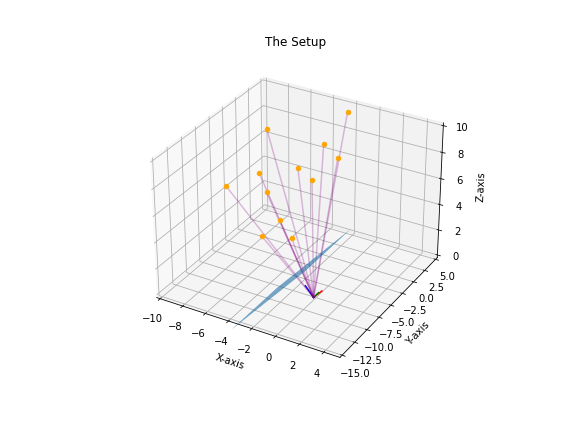

In [8]:
# define extrinsic parameters
# -------------------------------

# rotate an angle of pi/4 along the standard Y axis
angles = [np.pi/4]
order = 'y'

# transalte by the given offset
offset = np.array([0, -8, 0])

# define intrinsic parameters
# -------------------------------

f = 2
s = 0
a = 1
cx = 0
cy = 0
img_size = (10, 10)

#Create Extrinsic and Intrinsic Matrix
# create extrinsic matrix
# --------------------------

# create rotation transformation matrix
R = create_rotation_transformation_matrix(angles, order)
R_ = np.identity(4)
R_[:3, :3] = R

# create translation transformation matrix
T_ = create_translation_matrix(offset)

E = np.linalg.inv(R_ @ T_)
E = E[:-1, :]

# create intrinsic matrix
# ---------------------------
K = compute_intrinsic_parameter_matrix(f, s, a, cx, cy)

# choose the lower limit of the points such they're always beyond the image plane
n_points = 12
rand_points = generate_random_points(n_points, (-10, 0), (-10, 10), (f, 10))

# create an image grid
xx, yy, Z = create_image_grid(f, img_size)
# convert the image grid to homogeneous coordinates
pt_h = convert_grid_to_homogeneous(xx, yy, Z, img_size)
# transform the homogeneous coordinates
pt_h_transformed = R_ @ T_ @ pt_h
# convert the transformed homogeneous coordinates back to the image grid
xxt, yyt, Zt = convert_homogeneous_to_grid(pt_h_transformed, img_size)

# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-10, 5), ylim=(-15, 5), zlim=(0, 10))

# plot the camera in the world
ax = pr.plot_basis(ax, R, offset)
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

# plot the generated random points
c = 0
for i in range(n_points):
    point = rand_points[:, c]
    ax.scatter(*point, color="orange")
    ax.plot(*make_line(offset, point), color="purple", alpha=0.25)
    c += 1

ax.set_title("The Setup")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

Compute Projection of these points and form image

Text(0.5, 1.0, 'projection of points in the image')

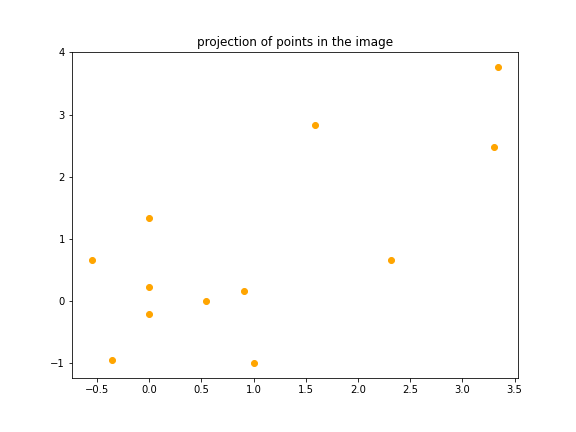

In [9]:
rand_points_camera = compute_coordniates_wrt_camera(rand_points, E, is_homogeneous=False)
projections = compute_image_projection(rand_points_camera, K)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(n_points):
    ax.scatter(*projections.reshape(-1, 2)[i], color="orange")
    
ax.set_title("projection of points in the image")

Perform Direct Linear Calibration

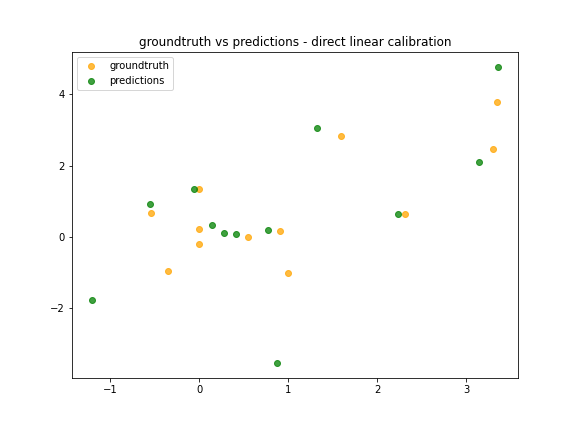

In [10]:
# compute the algebraic matrix A
A = create_algebraic_matrix(rand_points, projections)

# compute At x A
A_ = np.matmul(A.T, A)
# compute its eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A_)
# find the eigenvector with the minimum eigenvalue
# (numpy already returns sorted eigenvectors wrt their eigenvalues)
m = eigenvectors[:, 11]

# reshape m back to a matrix
M = m.reshape(3, 4)

#Compute predictions from the calibrated matrix M
predictions = compute_world2img_projection(rand_points, M, is_homogeneous=False)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(n_points):
    if i == 0:
        o_label = "groundtruth"
        g_label = "predictions"
    else:
        o_label = ""
        g_label = ""
        
    ax.scatter(*projections.reshape(-1, 2)[i], color="orange", alpha=0.75, label=o_label)
    ax.scatter(*predictions.reshape(-1, 2)[i], color="green", alpha=0.75, label=g_label)
    
ax.set_title("groundtruth vs predictions - direct linear calibration")
ax.legend()

Optimizing wrt Geometric Error

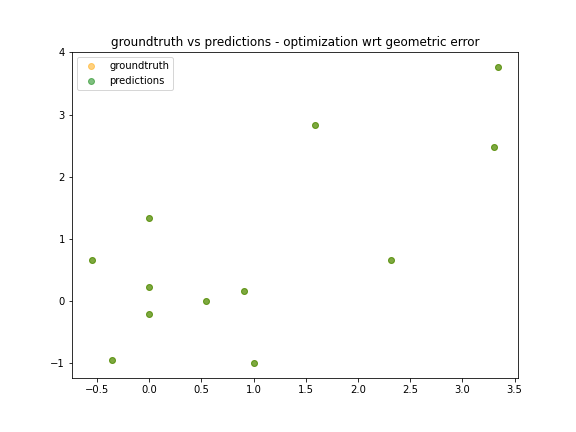

In [11]:
from scipy.optimize import minimize
result = minimize(geometric_error, m, args=(rand_points, projections))
M_ = result.x.reshape(3, 4)
predictions_v2 = compute_world2img_projection(rand_points, M_, is_homogeneous=False)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(n_points):
    if i == 0:
        o_label = "groundtruth"
        g_label = "predictions"
    else:
        o_label = ""
        g_label = ""
        
    ax.scatter(*projections.reshape(-1, 2)[i], color="orange", alpha=0.5, label=o_label)
    ax.scatter(*predictions_v2.reshape(-1, 2)[i], color="green", alpha=0.5, label=g_label)
    
ax.set_title("groundtruth vs predictions - optimization wrt geometric error")
ax.legend()

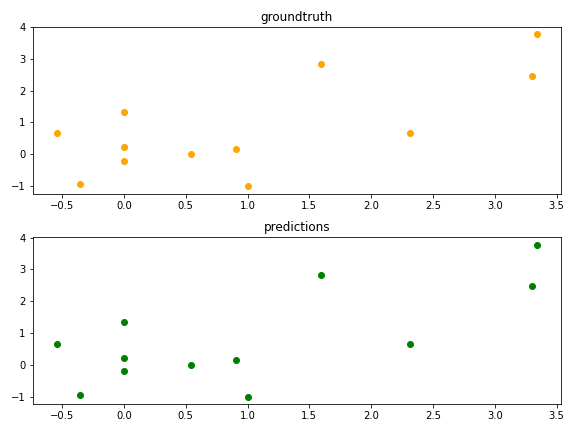

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

for i in range(n_points):
        
    axes[0].scatter(*projections.reshape(-1, 2)[i], color="orange", label=o_label)
    axes[1].scatter(*predictions_v2.reshape(-1, 2)[i], color="green", label=g_label)
    
axes[0].set_title("groundtruth")
axes[1].set_title("predictions")

plt.tight_layout()

In [13]:
from scipy.optimize import minimize

def geometric_error(m, world_points, projections):
    '''
    compute the geometric error wrt the 
    prediction projections and the groundtruth projections
    
    Parameters
    ------------
    m - np.ndarray, shape - (12)
        an 12-dim vector which is to be updated
    world_points - np.ndarray, shape - (3, n)
                   points in the world coordinate system
    projections - np.ndarray(2, n)
                  projections of the points in the image
    
    Returns
    --------
    error - float
            the geometric error
    '''
    assert world_points.shape[1] == projections.shape[1]
    error = 0
    n_points = world_points.shape[1]
    for i in range(n_points):
        X, Y, Z = world_points[:, i]
        u, v = projections[:, i]
        u_ = m[0] * X + m[1] * Y + m[2] * Z + m[3]
        v_ = m[4] * X + m[5] * Y + m[6] * Z + m[7]
        d = m[8] * X + m[9] * Y + m[10] * Z + m[11] 
        u_ = u_/d
        v_ = v_/d
        error += np.sqrt(np.square(u - u_) + np.square(v - v_))
    return error
  
result = minimize(geometric_error, m, args=(rand_points, projections))
M_ = result.x.reshape(3, 4)
predictions_v2 = compute_world2img_projection(rand_points, M_, is_homogeneous=False)